Order_ID             0
Product_Category    24
Product_Price       20
Customer_Age        15
Rating              25
Review_Text         21
Order_Date          10
dtype: int64
Order_ID            0.000000
Product_Category    4.752475
Product_Price       3.960396
Customer_Age        2.970297
Rating              4.950495
Review_Text         4.158416
Order_Date          1.980198
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          505 non-null    int64  
 1   Product_Category  481 non-null    object 
 2   Product_Price     485 non-null    float64
 3   Customer_Age      490 non-null    float64
 4   Rating            480 non-null    float64
 5   Review_Text       484 non-null    object 
 6   Order_Date        495 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 27.7+ KB


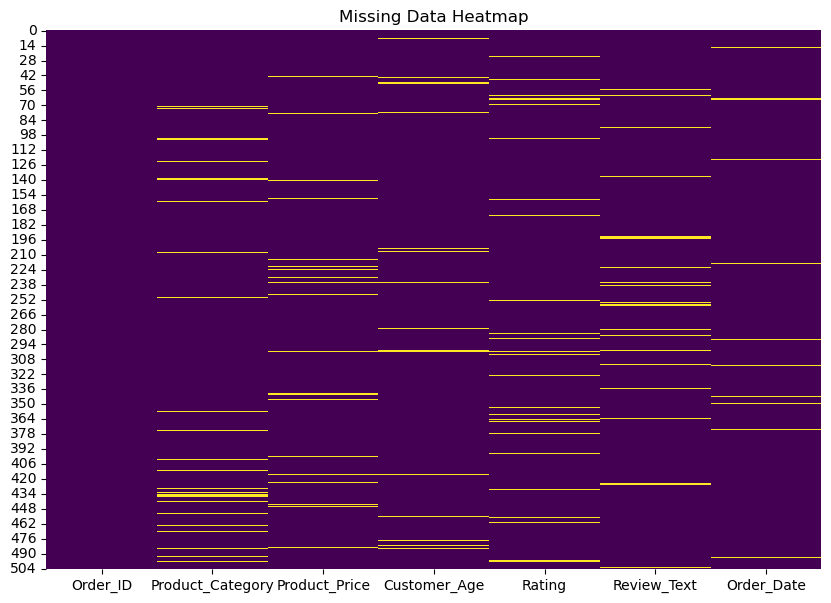

C:\Users\fUJITSU\AppData\Local\Temp\ipykernel_864\3819436532.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Order_Date'] = df['Order_Date'].fillna(method='ffill')


Before imputation: 
 Order_ID             0
Product_Category    24
Product_Price       20
Customer_Age        15
Rating              25
Review_Text         21
Order_Date          10
dtype: int64
After imputation: 
 Order_ID             0
Product_Category     0
Product_Price        0
Customer_Age        15
Rating              25
Review_Text         21
Order_Date           0
dtype: int64


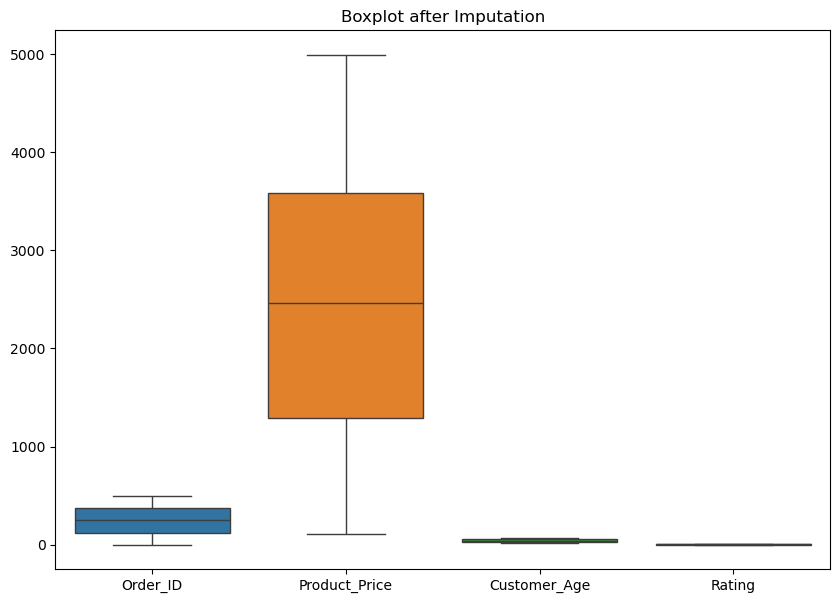

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, KNNImputer

# 1. Load the Dataset
df = pd.read_csv('Day 19_E-Commerce_Data.csv')

# 2. Identify Missing Data
missing_data = df.isna().sum()
print(missing_data)
missing_percentage = (missing_data / len(df)) * 100
print(missing_percentage)
df.info()

# 3. Analyze Missing Data Patterns
plt.figure(figsize=(10, 7))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# 4. Handle Missing Data

# 4.1 Numerical Imputation (Median)
numerical_columns = ['Product_Price']
numerical_imputer = SimpleImputer(strategy='median')
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

# 4.2 Categorical Imputation (Mode)
categorical_columns = ['Product_Category']
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# 4.3 Forward Fill for Date Fields
df['Order_Date'] = df['Order_Date'].fillna(method='ffill')

# 4.4 KNN Imputation for Numerical Data
knn_imputer = KNNImputer(n_neighbors=5)
df_imputed_knn = pd.DataFrame(knn_imputer.fit_transform(df.select_dtypes(include=['float64', 'int64'])), columns=df.select_dtypes(include=['float64', 'int64']).columns)

# 5. Evaluate the Impact

# Compare before and after imputation
print("Before imputation: \n", missing_data)
after_missing_data = df.isna().sum()
print("After imputation: \n", after_missing_data)

# Visualize the imputed values
plt.figure(figsize=(10, 7))
sns.boxplot(data=df)
plt.title('Boxplot after Imputation')
plt.show()

# 6. Final Data Export
df.to_csv('Day 19_E-Commerce_Data.csv', index=False)
